In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [637]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [638]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
passengerId = test_data.PassengerId

In [640]:
!pip install fancyimpute

In [641]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [642]:
data.shape

(891, 12)

#### Missing Value Treatment

In [643]:
round(100*(data.isnull().sum()/len(data.index)),2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [644]:
round(100*(test_data.isnull().sum()/len(test_data.index)),2)

PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Cabin          78.23
Embarked        0.00
dtype: float64

In [645]:
#checking Cabin
data[['Cabin']].head(20)

,Cabin
0,NaN
1,C85
2,NaN
3,C123
4,NaN
5,NaN
6,E46
7,NaN
8,NaN
9,NaN


In [0]:
#Lets split the column into Cabin Letter and Cabin number. As there are large number of missing values, instead of imputing we will replace the missing values with letter 'M'
data[['cabin_letter', 'cabin_number']] = data['Cabin'].str.extract('([A-Z])(\d*)', expand = True)
test_data[['cabin_letter', 'cabin_number']] = test_data['Cabin'].str.extract('([A-Z])(\d*)', expand = True)


In [0]:
data.drop(['Cabin','cabin_number'],axis=1,inplace=True)
test_data.drop(['Cabin','cabin_number'],axis=1,inplace=True)

In [648]:
data['cabin_letter'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: cabin_letter, dtype: int64

In [649]:
pd.crosstab(data.Survived,data.cabin_letter,normalize=True)

cabin_letter,A,B,C,D,E,F,G,T
Survived,,,,,,,,
0,0.039216,0.058824,0.117647,0.039216,0.039216,0.024510,0.009804,0.004902
1,0.034314,0.171569,0.171569,0.122549,0.117647,0.039216,0.009804,0.000000


- Of all the passengers, passengers in cabin B and C survived the most.
- As the cabin letters range from A-G,T, lets replace the missing cabin letter with letter 'M

In [650]:
data['cabin_letter'] = data['cabin_letter'].fillna('M')
test_data['cabin_letter'] = data['cabin_letter'].fillna('M')

round(100*(data.isnull().sum()/len(data.index)),2)

PassengerId      0.00
Survived         0.00
Pclass           0.00
Name             0.00
Sex              0.00
Age             19.87
SibSp            0.00
Parch            0.00
Ticket           0.00
Fare             0.00
Embarked         0.22
cabin_letter     0.00
dtype: float64

In [651]:
round(100*(test_data.isnull().sum()/len(test_data.index)),2)

PassengerId      0.00
Pclass           0.00
Name             0.00
Sex              0.00
Age             20.57
SibSp            0.00
Parch            0.00
Ticket           0.00
Fare             0.24
Embarked         0.00
cabin_letter     0.00
dtype: float64

In [652]:
#checking Embarked
data['Embarked'].value_counts(dropna=False) 

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [653]:
test_data['Embarked'].value_counts(dropna=False) 

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [654]:
data.loc[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,cabin_letter
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,B
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,B


- The null values are in Cabin B28, Pclass 1 and have a Ticket fare of 80.
- Lets see how PClass Fare and Embarked are related.

In [655]:
data.groupby(by=['Embarked','Pclass','cabin_letter'])['Fare'].describe()

count        mean  ...         75%       max
Embarked Pclass cabin_letter                     ...                      
C        1      A               7.0   38.357743  ...   39.862500   56.9292
                B              22.0  145.964018  ...  222.270800  512.3292
                C              21.0   98.582533  ...  110.883300  227.5250
                D              11.0   85.586000  ...   95.770850  113.2750
                E               5.0   92.905840  ...  134.500000  134.5000
                M              19.0  102.376526  ...  108.654150  512.3292
         2      D               2.0   13.333350  ...   13.562525   13.7917
                M              15.0   26.961667  ...   37.004200   41.5792
         3      F               1.0   22.358300  ...   22.358300   22.3583
                M              65.0   11.042634  ...   14.458300   22.3583
Q        1      C               2.0   90.000000  ...   90.000000   90.0000
         2      E               1.0   12.350000  ...   12.350000   12.3500
                M               2.0   12.350000  ...   12.350000   12.3500
         3      F               1.0    7.750000  ...    7.750000    7.7500
                M              71.0   11.231751  ...   11.979150   29.1250
S        1      A               8.0   40.731763  ...   50.871850   81.8583
                B              23.0   85.372283  ...  120.000000  211.3375
                C              36.0  101.630442  ...  152.028125  263.0000
                D              18.0   49.719906  ...   71.240625   77.9583
                E              20.0   46.448750  ...   55.900000   79.6500
                M              21.0   53.751986  ...   52.000000  164.8667
                T               1.0   35.500000  ...   35.500000   35.5000
         2      D               2.0   13.000000  ...   13.000000   13.0000
                E               3.0   11.333333  ...   11.750000   13.0000
                F               8.0   23.750000  ...   29.250000   39.0000
                M             151.0   20.421854  ...   26.000000   73.5000
         3      E               3.0   11.000000  ...   12.475000   12.4750
                F               3.0    7.650000  ...    7.650000    7.6500
                G               4.0   13.581250  ...   16.700000   16.7000
                M             343.0   14.749523  ...   16.100000   69.5500

[30 rows x 8 columns]

In [0]:
data['Embarked'] = data['Embarked'].fillna('C')

In [657]:
round(100*(data.isnull().sum()/len(data.index)),2)

PassengerId      0.00
Survived         0.00
Pclass           0.00
Name             0.00
Sex              0.00
Age             19.87
SibSp            0.00
Parch            0.00
Ticket           0.00
Fare             0.00
Embarked         0.00
cabin_letter     0.00
dtype: float64

In [0]:
#data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [659]:
round(100*(test_data.isnull().sum()/len(test_data.index)),2)

PassengerId      0.00
Pclass           0.00
Name             0.00
Sex              0.00
Age             20.57
SibSp            0.00
Parch            0.00
Ticket           0.00
Fare             0.24
Embarked         0.00
cabin_letter     0.00
dtype: float64

- Only Age and Fare are missing. We will impute these missing values by using IterativeImputer. Will work on these in feature engineering section.

#### Exploratory data analysis

Look for variables that looks most important in deciding whether a person survived or not.
- PClass
- Sex
- Age

In [0]:
#Function to check total counts, skewness and importance of a categorical column based on conversion rate. 
def check_count_conversion_rate(data,X,target):
    #checking counts of col
    col_counts = pd.DataFrame(data[X].value_counts()).reset_index()
    col_counts.columns = [X,'Counts']
    col_counts['Total%'] = col_counts['Counts']/len(data.index)
    #checking conversion rate by col
    groupby_col = pd.DataFrame(data.groupby(X)[target].mean()).reset_index()

    col_counts_percentage = col_counts.merge(groupby_col,how='inner',on=X)
    return col_counts_percentage


In [661]:
# Checking Sex column 
pd.crosstab(data.Survived,data.Sex,normalize = True)

Sex,female,male
Survived,,
0,0.090909,0.525253
1,0.261504,0.122334


In [662]:
check_count_conversion_rate(data,'Sex','Survived')

,Sex,Counts,Total%,Survived
0,male,577,0.647587,0.188908
1,female,314,0.352413,0.742038


- out of all the passengers 26% of them were female who survived.
- Out of all the females, 74% of them survived

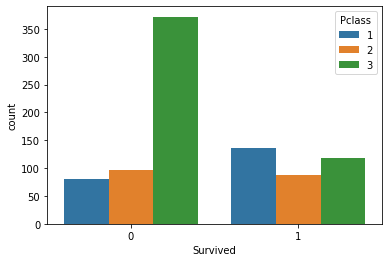

In [663]:
#Checking distribution of PClass 
sns.countplot("Survived",data=data,hue='Pclass')

In [664]:
check_count_conversion_rate(data,'Pclass','Survived')

,Pclass,Counts,Total%,Survived
0,3,491,0.551066,0.242363
1,1,216,0.242424,0.629630
2,2,184,0.206510,0.472826


- Though there are less number of passengers in Pclass 1 but they have the maximum survival rate.
- 63% of first class passengers survived and 48% of second class passengers survived. 

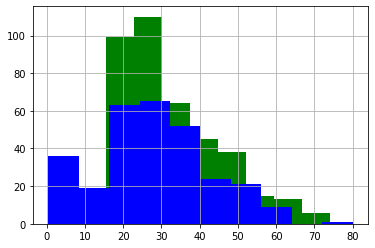

In [665]:
#Checking Age
data.loc[data['Survived']==0]['Age'].hist(color='green')
data.loc[data['Survived']==1]['Age'].hist(color='blue')


- Younger Passengers survuved more

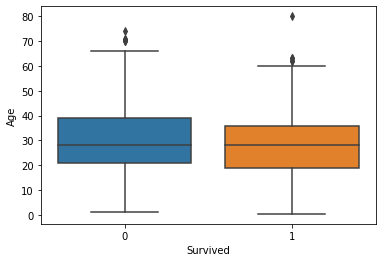

In [666]:
sns.boxplot(y='Age',x='Survived',data=data)

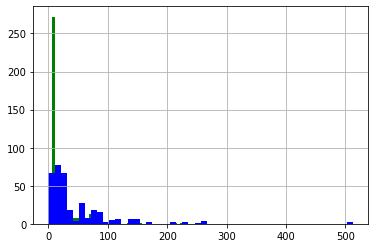

In [667]:
#Checking Age
data.loc[data['Survived']==0]['Fare'].hist(color='green',bins=50)
data.loc[data['Survived']==1]['Fare'].hist(color='blue',bins=50)


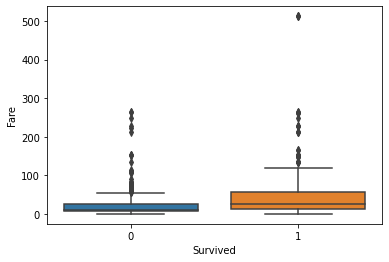

In [668]:
sns.boxplot(x='Survived',y='Fare',data=data)

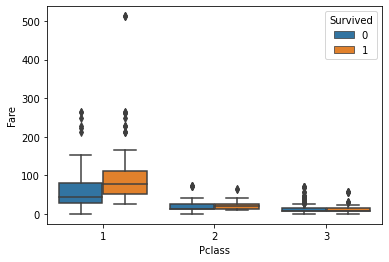

In [669]:
sns.boxplot(x='Pclass',y='Fare',hue='Survived',data=data)

- Higher fare passegers survived more.

In [670]:
data['Parch'].value_counts(dropna=False)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [671]:
check_count_conversion_rate(data,'Parch','Survived')

,Parch,Counts,Total%,Survived
0,0,678,0.760943,0.343658
1,1,118,0.132435,0.550847
2,2,80,0.089787,0.500000
3,5,5,0.005612,0.200000
4,3,5,0.005612,0.600000
5,4,4,0.004489,0.000000
6,6,1,0.001122,0.000000


In [672]:
test_data['Parch'].value_counts(dropna=False)

0    324
1     52
2     33
3      3
9      2
4      2
6      1
5      1
Name: Parch, dtype: int64

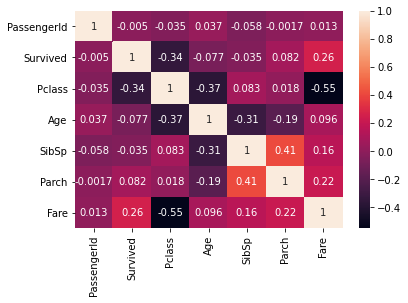

In [673]:
sns.heatmap(data.corr(),annot=True)

#### Feature Engineering

In [674]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,cabin_letter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,M
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,M


Let us use text mining to extract details from Ticket and Nane.
- From Name we can extract title like Mr, Ms
- From Ticket we can extract the letters which might be usefull for us.

In [675]:
#Extracting titles from name
data['Title'] = [i.split('.')[0] for i in data['Name']]
data['Title'] = [i.split(',')[1] for i in data['Title']]

test_data['Title'] = [i.split('.')[0] for i in test_data['Name']]
test_data['Title'] = [i.split(',')[1] for i in test_data['Title']]

data['Title'].value_counts(dropna = False)

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Col               2
 Major             2
 Mme               1
 Don               1
 Lady              1
 the Countess      1
 Capt              1
 Jonkheer          1
 Sir               1
 Ms                1
Name: Title, dtype: int64

In [676]:
data['Title'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [0]:
data.Title = data.Title.apply(lambda x:x.strip())
test_data.Title = test_data.Title.apply(lambda x:x.strip())

Combining together the titles with similar meanings


In [678]:
data.Title.replace(('Ms','Mlle','Mme'),'Miss',inplace=True)
data.Title.replace(('Rev','Don','Dr','Major','Lady','Sir','Col','Capt','the Countess','Jonkheer'),'Royalty',inplace=True)

test_data.Title.replace(('Ms','Mlle','Mme'),'Miss',inplace=True)
test_data.Title.replace(('Rev','Don','Dr','Major','Lady','Sir','Col','Capt','the Countess','Jonkheer','Dona'),'Royalty',inplace=True)

data.Title.value_counts(dropna=False)

Mr         517
Miss       186
Mrs        125
Master      40
Royalty     23
Name: Title, dtype: int64

In [679]:
test_data.Title.value_counts(dropna=False)

Mr         240
Miss        79
Mrs         72
Master      21
Royalty      6
Name: Title, dtype: int64

In [680]:
check_count_conversion_rate(data,'Title','Survived')

,Title,Counts,Total%,Survived
0,Mr,517,0.580247,0.156673
1,Miss,186,0.208754,0.704301
2,Mrs,125,0.140292,0.792000
3,Master,40,0.044893,0.575000
4,Royalty,23,0.025814,0.347826


- Miss and Mrs Survived the most with 70% and ~80% survival rate
- Among the males, passengers with Title Master have the highest conversion rate ~57% 


In [0]:
data.drop(['Name','PassengerId','Ticket'],axis=1,inplace=True)
test_data.drop(['Name','PassengerId','Ticket'],axis=1,inplace=True)

Lets see if we can derive some columns

In [0]:
#Imputing age and Fare

In [683]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_letter,Title
0,0,3,male,22.0,1,0,7.2500,S,M,Mr
1,1,1,female,38.0,1,0,71.2833,C,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,M,Miss
3,1,1,female,35.0,1,0,53.1000,S,C,Mrs
4,0,3,male,35.0,0,0,8.0500,S,M,Mr


In [684]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_letter,Title
0,3,male,34.5,0,0,7.8292,Q,M,Mr
1,3,female,47.0,1,0,7.0000,S,C,Mrs
2,2,male,62.0,0,0,9.6875,Q,M,Mr
3,3,male,27.0,0,0,8.6625,S,C,Mr
4,3,female,22.0,1,1,12.2875,S,M,Mrs


In [0]:
#Checking Age - We will impute Age by using Iterative Imputer

In [0]:
#Creating dummies
data.Sex.replace(['female','male'],[0,1],inplace=True)
test_data.Sex.replace(['female','male'],[0,1],inplace=True)

In [687]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_letter,Title
0,0,3,1,22.0,1,0,7.2500,S,M,Mr
1,1,1,0,38.0,1,0,71.2833,C,C,Mrs
2,1,3,0,26.0,0,0,7.9250,S,M,Miss
3,1,1,0,35.0,1,0,53.1000,S,C,Mrs
4,0,3,1,35.0,0,0,8.0500,S,M,Mr


In [688]:
# For pd.get_dummies: the data should be object data type
# Create a subset of categorical data
data_cat = data[['Pclass','SibSp','Embarked','cabin_letter','Title']]
test_data_cat = test_data[['Pclass','SibSp','Embarked','cabin_letter','Title']]
data_cat.head()

,Pclass,SibSp,Embarked,cabin_letter,Title
0,3,1,S,M,Mr
1,1,1,C,C,Mrs
2,3,0,S,M,Miss
3,1,1,S,C,Mrs
4,3,0,S,M,Mr


In [689]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Pclass        891 non-null    int64 
 1   SibSp         891 non-null    int64 
 2   Embarked      891 non-null    object
 3   cabin_letter  891 non-null    object
 4   Title         891 non-null    object
dtypes: int64(2), object(3)
memory usage: 34.9+ KB


In [690]:
#There are still categorical columns which are of type int. Convert them to object data datatype
for i in ['Pclass','SibSp','Embarked','cabin_letter','Title']:
  data_cat[i] = data_cat[i].astype(str)
  test_data_cat[i] = test_data_cat[i].astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [691]:
test_data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Pclass        418 non-null    object
 1   SibSp         418 non-null    object
 2   Embarked      418 non-null    object
 3   cabin_letter  418 non-null    object
 4   Title         418 non-null    object
dtypes: object(5)
memory usage: 16.5+ KB


In [0]:
#Now we can create dummies
data_cat_dummy1 = pd.get_dummies(data_cat[['Pclass','SibSp','Embarked','Title']],drop_first=True)
data_cat_dummy2 = pd.get_dummies(data_cat['cabin_letter'])

test_data_cat_dummy1 = pd.get_dummies(test_data_cat[['Pclass','SibSp','Embarked','Title']],drop_first=True)
test_data_cat_dummy2 = pd.get_dummies(test_data_cat['cabin_letter'])

In [0]:
#Dropping value 'M' (Missing) as this was the value which we replace the NaN 
data_cat_dummy2.drop(['M'],axis=1,inplace=True)
test_data_cat_dummy2.drop(['M'],axis=1,inplace=True)

In [0]:
data.drop(['Pclass','SibSp','Embarked','cabin_letter','Title'],axis=1,inplace=True)
test_data.drop(['Pclass','SibSp','Embarked','cabin_letter','Title'],axis=1,inplace=True)

In [695]:
data.head()

,Survived,Sex,Age,Parch,Fare
0,0,1,22.0,0,7.2500
1,1,0,38.0,0,71.2833
2,1,0,26.0,0,7.9250
3,1,0,35.0,0,53.1000
4,0,1,35.0,0,8.0500


In [696]:
data = pd.concat([data,data_cat_dummy1,data_cat_dummy2],axis=1)
test_data = pd.concat([test_data,test_data_cat_dummy1,test_data_cat_dummy2],axis=1)

print(data.shape)

(891, 27)


In [697]:
print(test_data.shape)

(418, 26)


In [0]:
from fancyimpute import IterativeImputer

In [699]:
#Using Iterative Imputer to impute missing value of Age

#First let us store the column names
data_ii  = data.drop(['Survived'],axis=1)
data_cols = data_ii.columns

ii = IterativeImputer()
data_clean = pd.DataFrame(ii.fit_transform(data.drop(['Survived'],axis=1)))
test_data_clean = pd.DataFrame(ii.transform(test_data))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [700]:
# the output is the numpy array.
# ii looks for all the columns which have missing values and then imputes them
# need to cross check the age imputation as ii can assign values from -inf to +inf
data_clean.columns=data_cols
test_data_clean.columns = data_cols
data_clean.head()

,Sex,Age,Parch,Fare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Royalty,A,B,C,D,E,F,G,T
0,1.0,22.0,0.0,7.2500,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,38.0,0.0,71.2833,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,26.0,0.0,7.9250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,35.0,0.0,53.1000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,35.0,0.0,8.0500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [701]:
data.shape

(891, 27)

In [702]:
#round(100*(data_clean.isnull().sum()/len(data_clean)),2)
round(100*(test_data_clean.isnull().sum()/len(test_data_clean)),2)

Sex              0.0
Age              0.0
Parch            0.0
Fare             0.0
Pclass_2         0.0
Pclass_3         0.0
SibSp_1          0.0
SibSp_2          0.0
SibSp_3          0.0
SibSp_4          0.0
SibSp_5          0.0
SibSp_8          0.0
Embarked_Q       0.0
Embarked_S       0.0
Title_Miss       0.0
Title_Mr         0.0
Title_Mrs        0.0
Title_Royalty    0.0
A                0.0
B                0.0
C                0.0
D                0.0
E                0.0
F                0.0
G                0.0
T                0.0
dtype: float64

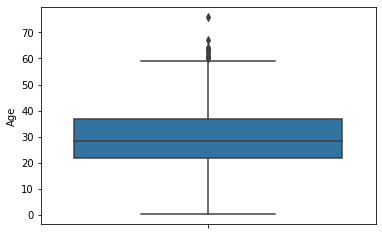

In [703]:
#cross checking age
sns.boxplot(y=test_data_clean['Age'])

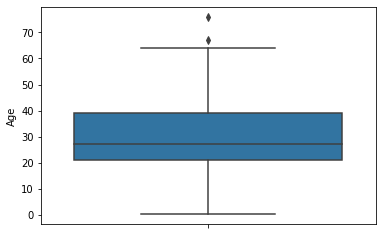

In [704]:
sns.boxplot(y=test_data['Age'])

Lets bucket the 'Age' into Groups as follows
- 'Age' < 16 :0
- 16 & <=32 :1
- 32 & <=48 :2
- 48 & <=64 :3
- 'Age' >64 :4 

In [0]:
#to convert continuous variables to categorical using pd.cut function
#data_clean['ageGroup'] = pd.cut(data_clean['Age'],bins = [0,16,32,48,64,300],labels=[0,1,2,3,4])
#test_data_clean['ageGroup'] = pd.cut(test_data_clean['Age'],bins = [0,16,32,48,64,300],labels=[0,1,2,3,4])



In [0]:
#data_clean.loc[data_clean['ageGroup'].isnull()]

In [0]:
#data_clean.drop(['Age'],axis=1,inplace=True)
#test_data_clean.drop(['Age'],axis=1,inplace=True)

- Mean value did not change after imputation. Therefore, all the imputations are correct

In [708]:
data_clean.columns

Index(['Sex', 'Age', 'Parch', 'Fare', 'Pclass_2', 'Pclass_3', 'SibSp_1',
       'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Embarked_Q',
       'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Royalty',
       'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'],
      dtype='object')

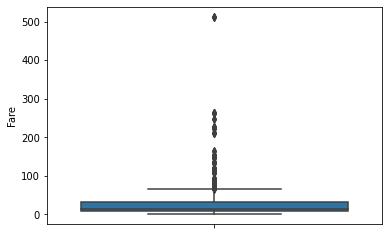

In [709]:
#checking for outlier
sns.boxplot(y=data['Fare'])

In [0]:
# There is only one data point that lies far apart. It is better to delete that one data point and keep the others as it is.
# the other outliers are actually depicting pattern in the data. It is better not to cap it. Also the outliers are more in number.
# Any change in the outlier will change the pattern and meaning of the data.
data_clean.drop(data_clean.index[data_clean['Fare']>300],inplace=True)
data.drop(data.index[data['Fare']>300],inplace=True)

In [711]:
data_clean.shape
data.shape

(888, 27)

In [0]:
#creating dummies for AgeGroup now
#data_cat_dummy = pd.get_dummies(data_clean['ageGroup'],drop_first=True)
#test_data_clean_cat_dummy = pd.get_dummies(test_data_clean['ageGroup'],drop_first=True)

#data_clean = pd.concat([data_clean,data_cat_dummy],axis=1)
#test_data_clean = pd.concat([test_data_clean,test_data_clean_cat_dummy],axis=1)

In [713]:
data_clean.isnull().sum()

Sex              0
Age              0
Parch            0
Fare             0
Pclass_2         0
Pclass_3         0
SibSp_1          0
SibSp_2          0
SibSp_3          0
SibSp_4          0
SibSp_5          0
SibSp_8          0
Embarked_Q       0
Embarked_S       0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Royalty    0
A                0
B                0
C                0
D                0
E                0
F                0
G                0
T                0
dtype: int64

#### Scaling Data

In [0]:
#diving data in train and test
X = data_clean
y = data['Survived']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100,stratify=y)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#### Modelling

In [719]:
#checking data imbalance
100 * y_train.value_counts()/len(y_train)

0    61.835749
1    38.164251
Name: Survived, dtype: float64

In [720]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)
print("Accuracy: {}".format(metrics.accuracy_score(y_test,y_pred)))
print("Recall: {}".format(metrics.recall_score(y_test,y_pred)))


Accuracy: 0.8202247191011236
Recall: 0.7745098039215687


In [721]:
# Logistic Regression model with class_weight
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(class_weight='balanced')
#logreg = LogisticRegression(class_weight={0:38.164251,1:61.835749})
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)
print("Accuracy: {}".format(metrics.accuracy_score(y_test,y_pred)))
print("Recall: {}".format(metrics.recall_score(y_test,y_pred)))


Accuracy: 0.797752808988764
Recall: 0.8137254901960784


- We notice that after applying the class_weight option, the recall is increased to 78% from 73%

In [722]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

y_pred = rf_model.predict(X_test)
print("Accuracy: {}".format(metrics.accuracy_score(y_test,y_pred)))
print("Recall: {}".format(metrics.recall_score(y_test,y_pred)))


Accuracy: 0.8277153558052435
Recall: 0.7745098039215687


In [0]:
#hyper parameter tuning
# Create the parameter grid based on the results of random search 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

cv = StratifiedShuffleSplit(n_splits=3, random_state=2)
param_grid = {
    'max_depth': [4,5,10],
    'min_samples_leaf': [5, 6,7],
    'min_samples_split': [5, 10, 16],
    'n_estimators': [100,500,700], 
    'max_features': [5,10,15]
}
# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = cv, n_jobs = -1,verbose = 1)


In [748]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed:  7.2min finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=2, test_size=None,
            train_size=None),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1...
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
         

In [749]:
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8835978835978836 using {'max_depth': 4, 'max_features': 10, 'min_samples_leaf': 5, 'min_samples_split': 16, 'n_estimators': 100}


In [751]:
#using best parameters after tuning
rf_model = RandomForestClassifier(class_weight='balanced',
                                  criterion='gini',
                                  min_samples_leaf =5,
                                  min_samples_split= 16,
                                  n_estimators=100,
                                  max_features=10,
                                  max_depth=4)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
print("Accuracy: {}".format(metrics.accuracy_score(y_test,y_pred)))
print("Recall: {}".format(metrics.recall_score(y_test,y_pred)))

Accuracy: 0.8202247191011236
Recall: 0.7647058823529411


In [752]:
#Cheking feature importance
pd.concat([pd.DataFrame(X.columns,columns = ['variables']),
           pd.DataFrame(rf_model.feature_importances_,columns = ['importance'])],
          axis=1).sort_values(by='importance',ascending=False)

,variables,importance
0,Sex,0.321254
15,Title_Mr,0.273721
3,Fare,0.117016
1,Age,0.059158
5,Pclass_3,0.058263
14,Title_Miss,0.037499
16,Title_Mrs,0.026507
13,Embarked_S,0.017223
22,E,0.014682
2,Parch,0.013415


#### Predicting on Provided Test data

In [753]:
test_data_clean.isnull().sum()

Sex              0
Age              0
Parch            0
Fare             0
Pclass_2         0
Pclass_3         0
SibSp_1          0
SibSp_2          0
SibSp_3          0
SibSp_4          0
SibSp_5          0
SibSp_8          0
Embarked_Q       0
Embarked_S       0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Royalty    0
A                0
B                0
C                0
D                0
E                0
F                0
G                0
T                0
dtype: int64

In [0]:
#scaling test data
test_data_scaled = scaler.transform(test_data_clean)

In [0]:
test_pred = rf_model.predict(test_data_scaled)

In [0]:
submission = pd.DataFrame({
        "PassengerId": passengerId,
        "Survived": test_pred
    })
submission['Survived'] = submission['Survived'].astype('int')
#submission.to_csv('gender_submission.csv', index=False)

In [757]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [0]:
submission.to_csv('gender_submission-stratified.csv', index=False)

In [0]:
#Score in Kaggle: 0.775